# Economic data analysis

## Explore a small dataset and get comfortable using JupyterLab

In this notebook, we walk you through a basic data analysis example using economic data provided by the [NASDAQ Data Link](https://data.nasdaq.com/) API.

> To sign up for a free NASDAQ Data Link account and access to free (and premium) datasets, visit [this link](https://docs.data.nasdaq.com/docs#finding-data-on-nasdaq-data-link).

We will briefly explore the ["Federal Reserve Economic Data" (FRED)](https://data.nasdaq.com/data/FRED-federal-reserve-economic-data/documentation?anchor=prices-and-inflation) datasets. These are time-series datasets collected by the Federal Reserve Bank of St. Louis since about 1950 that covers growth, inflation, employment, interest rates, and more.

We have included a few exercises that provide you with an opportunity to get your hands dirty.

In [43]:
!pip install nasdaq-data-link
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 21.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 22.3 MB/s eta 0:00:0000:01


In [18]:
import nasdaqdatalink
import numpy as np

%matplotlib inline

In [2]:
# read API key from file
nasdaqdatalink.read_key(filename="~/shared/PyDataNYC/nasdaq_api_key")

In [3]:
# load a particular dataset
data = nasdaqdatalink.get("FRED/GDP")

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


## Exercises

1. Using the FRED datasets, what date did the US have the highest Civilian Unemployment Rate? and what was this rate?

In [6]:
UNRATE = nasdaqdatalink.get("FRED/UNRATE")

In [7]:
UNRATE.loc[UNRATE.idxmax()]

,Value
Date,
2020-04-01,14.7


2. Create a line plot of Civilian Unemployment Rate for the 6 months before and after this maximum Civilian Unemployment Rate.

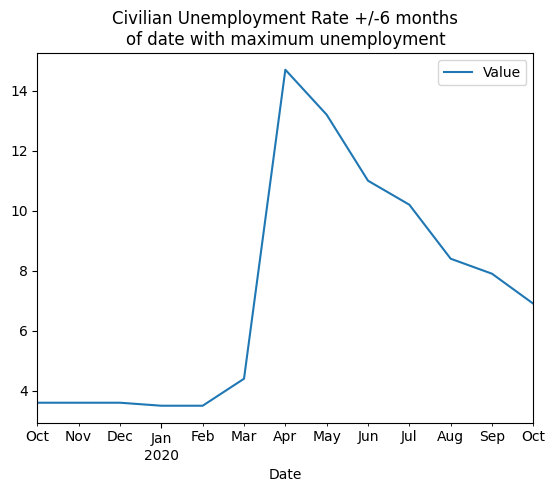

In [80]:
n_months = 6
idx = np.searchsorted(UNRATE.index, UNRATE.idxmax())

start = UNRATE.index[max(0, idx - n_months)].date[0]
stop = UNRATE.index[min(idx + n_months, len(UNRATE) - 1)].date[0]

plot = UNRATE.loc[start:stop].plot(
    title="Civilian Unemployment Rate +/-6 months\nof date with maximum unemployment",
);

3. Add the 12-month rolling average to the plot you just generated.

---
## 👏 Next:
* [01b_vscode_demo](./01b_vscode_demo.py)
* [02_dask](../02_dask.ipynb)
---